## 注意事項

- **作業繳交**
	1. 截止日期: 以Cool為準。
	1. 繳交方式: 上傳至Cool作業區。
	1. 檔案格式: 請**修改助教提供之ipynb檔**，繳交修改後的檔案，並以學號作為檔名。(ex. hw1_b1234567.ipynb)
	1. 抄襲以零分計算，並由校規處置。
	1. 遲交24hr以內，分數x0.8，超過一天不予繳交
- **程式碼要求**
	1. 除非題目要求，程式碼請務必正確的包裝在function當中(import 內建函式庫不在此限ex. math)
	1. 函式定義外自己的測試程式碼請放在測試區中
	1. 強烈建議自行複製範例輸出的字串，和自己的輸出字串用函式比對，確認是否完全一樣
	1. 實際評分會包含範例以外的測試資料
	1. 請注意"回傳"與"print"的差別

## [題目連結 HackMD](https://hackmd.io/@OridnaryHuman/HydkxNMcY)

# **Q1**

In [1]:
def SearchName(thres):
    import pandas as pd
    import numpy as np
    #讀檔案(把1880年分開來算)
    df1 = pd.read_csv('names/yob1880.txt', sep=",", header=None)
    #讀檔案(從1881年開始，每讀一年concat一次)
    for n in range(130):
        year = 1881 + n
        df2 = pd.read_csv('names/yob%d.txt'%(year), sep=",", header=None)
        df1 = pd.concat([df1,df2])
    df1.columns = ['name','sex','births'] #新增欄位名稱
    group = df1.groupby(['name']).agg({'births':sum}) #合併相同姓名的出生數
    value = group.sort_values(['births'],ascending=False) #出生數按數量由大到小排列
    #給定上界，產生最接近上界前五名的series
    df = value[value['births'] < thres].head()
    series = df['births']
    print(series)
SearchName(8000000)

name
James      5072771
John       5061897
Robert     4788050
Michael    4265373
Mary       4119074
Name: births, dtype: int64


# **Q2**

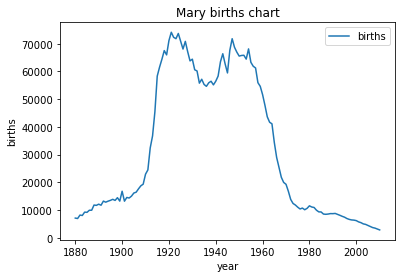

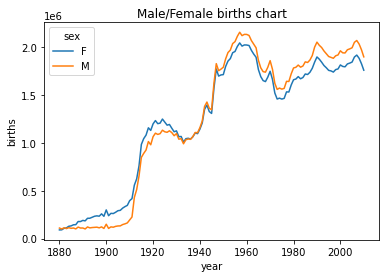

In [2]:
def Graphs():
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    years = range(1880,2011)
    year_column = [] #裝年分欄位的list
    columns = ['name','sex','births'] #新增欄位名稱
    for year in years:
        path = 'names/yob%d.txt'%(year)
        df = pd.read_csv(path,names=columns)
        df['year'] = year #新增一個year的欄位
        year_column.append(df) #新增year進去dataframe對應的欄位
    names = pd.concat(year_column,ignore_index=True)
    #各年度命名Mary數量趨勢圖
    mary = names['name']=='Mary'
    mary_labels = names.loc[mary] #找出所有Mary
    mary_group = mary_labels.groupby(['year']).agg({'births':sum}) #依照年份將Mary的男女數相加
    mary_births = mary_group.pivot_table('births',index='year')
    mary_births.plot(title='Mary births chart',ylabel='births')
    #各年度男女出生數量趨勢圖
    total_births = names.pivot_table('births',index='year',columns='sex',aggfunc=sum)
    total_births.plot(title='Male/Female births chart',ylabel='births')
Graphs()

# **Q3 - Train your model**

In [3]:
def Q3_Train_your_model():
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    df = pd.read_csv('coin.csv')
    #選取csv所需資料
    X = df.iloc[:,0].values.reshape(-1,1)
    y = df.iloc[:,1].values.reshape(-1,1)
    #Splitting data into 80% training and 20% test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    reg = LinearRegression().fit(X_train, y_train) #訓練資料建立模型
    preds = reg.predict(X_test) #預測結果
    print(mean_squared_error(y_test,preds))
Q3_Train_your_model()

170.189057194499


# 測試區(實際評分會包含範例以外的測試資料)
### 在if當中的程式可以不用移除

In [ ]:
if __name__ == '__main__':
  # You can leave anything you want in this block.
  print("Hello world.")